# Machine Learning and Data Analysis using Sklearn Pandas Seaborn

# Step 1:

### import library

In [78]:
import pandas as pd
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [6]:
print(os.listdir())
#os.rename("train_and_test2.csv", "Titanic.csv")

['.DS_Store', 'Untitled.ipynb', 'titanic_test.csv', '.ipynb_checkpoints', 'titanic_train.csv']


# Step 2:


### know your Dataset Well

In [7]:
df = pd.read_csv("titanic_train.csv")
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 3:

## Do a quick Plot on Dataset and know the dataset Better

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


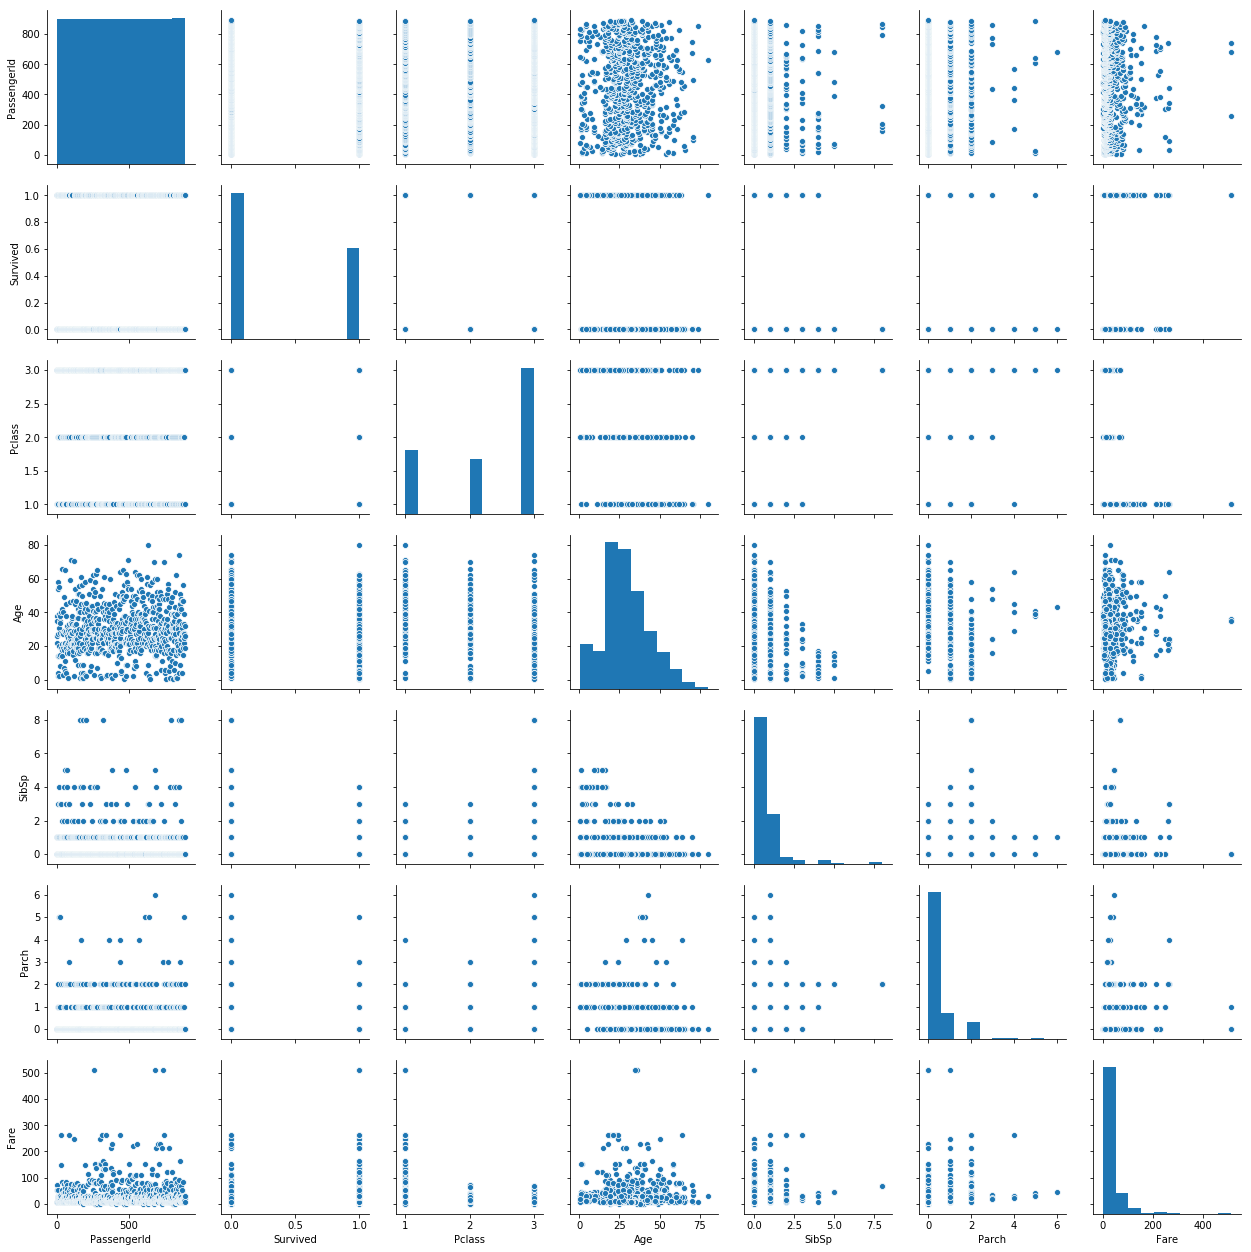

In [8]:
sns.pairplot(df)

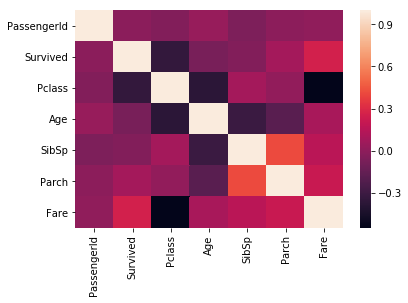

In [9]:
sns.heatmap(df.corr())

## Clean data

In [12]:
df.isnull().head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False


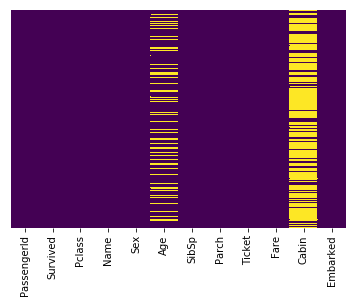

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Shows that every Yellow shows that data is Empty  we are missing Age and Cabin Data

## How many People Survived

Text(0.5, 1.0, 'Total People who Survived ')

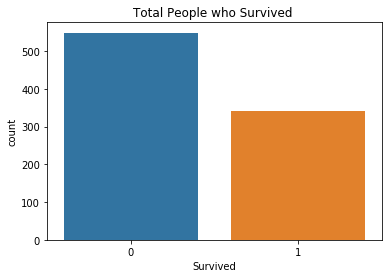

In [23]:
sns.countplot(x=df["Survived"], data=df)
plt.title("Total People who Survived ")

Text(0.5, 1.0, 'Male and Female who Survived')

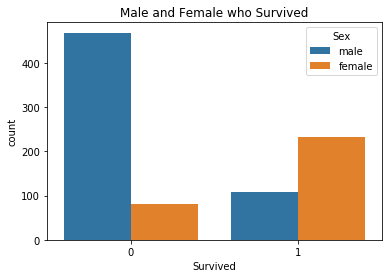

In [22]:
import matplotlib.pyplot as plt
sns.countplot(x=df["Survived"], data=df, hue="Sex")
plt.title("Male and Female who Survived")

Text(0.5, 1.0, 'People who Survived from 1st Class 2nd and 3rd')

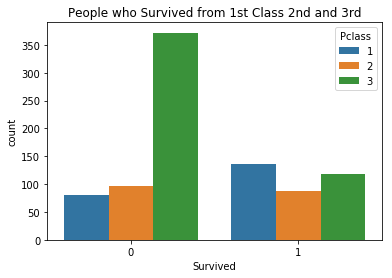

In [25]:
sns.countplot(x=df["Survived"], data=df, hue="Pclass")
plt.title("People who Survived from 1st Class 2nd and 3rd")

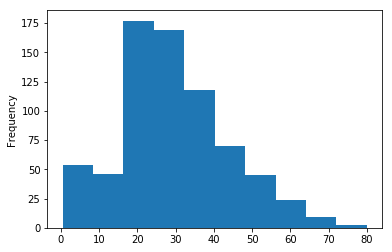

In [29]:
df["Age"].plot.hist()

# Machine Learning Model to see if Person Survived or not 

In [70]:
df["Sex"] = pd.get_dummies(df["Sex"],drop_first=True)
df=df.dropna()

In [71]:
class NeuralNet(object):
    def __init__(self):
        self.X_Train, self.X_Test, self.Y_Train,self.Y_Test = self.preprocess()

    @staticmethod
    def preprocess():
        X_Data = df[['Pclass','Sex','Age','Fare']]
        Y_Data = df[['Survived']]

        X_Train, X_Test, Y_Train,Y_Test = train_test_split(X_Data,
                                                               Y_Data,
                                                               test_size=0.3,
                                                           random_state=101)
        return X_Train, X_Test, Y_Train,Y_Test
    
    def model_get(self):
        self.lm = LogisticRegression()
        self.lm.fit(self.X_Train,self.Y_Train)
    
    def predict(self):
        predicted = self.lm.predict(X_Test)
        return predicted 

In [76]:
obj = NeuralNet()
obj.model_get()
predicted = obj.predict()
X_Train, X_Test, Y_Train,Y_Test = obj.preprocess()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           0       0.76      0.59      0.67        22
           1       0.76      0.88      0.82        33

   micro avg       0.76      0.76      0.76        55
   macro avg       0.76      0.73      0.74        55
weighted avg       0.76      0.76      0.76        55



In [79]:
confusion_matrix(Y_Test, predicted)

array([[13,  9],
       [ 4, 29]])

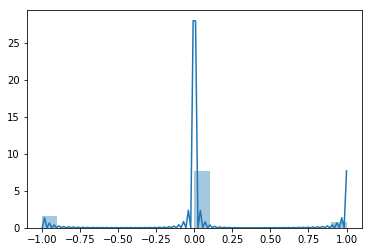

In [90]:
sns.distplot((Y_Test.T- predicted.T), bins=20)